In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t

folder_path = './2servers_json/'


In [23]:
def get_jsons(folder_path):
    # create a list to store the (file_name, data) tuples
    json_data = []
    
    # loop through all the files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as f:
                data = pd.read_json(f)
                json_data.append((file_name, data))
                
    return json_data



In [24]:
def JobAvgTimeSys(json_data):
    # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:mean':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:mean':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic


In [25]:
def JobMinTimeSys(json_data):
     # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:min':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:min':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [26]:
def JobMaxTimeSys(json_data):
    # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:max':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:max':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [27]:
def PointEstConfInt(df_list1,df_list2):
    # compute the point estimate and confidence interval for the mean of each module
    df = pd.concat(df_list1, ignore_index=True)
    df2 = pd.concat(df_list2, ignore_index=True)

    elastic_points = {}
    inelastic_points = {}
    

    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        elastic_points[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )

    for filename in df['filename'].unique():
        module = df2.iloc[0]['module']
        values = df2.loc[df2['filename'] == filename, 'value']
        name = df2.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        inelastic_points[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )
    return elastic_points, inelastic_points

In [28]:
def plotAvgTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:3])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Average Time in System ')
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Average Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    plt.show()




In [29]:
def plotMaxTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:5])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:5])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Max Time in System ')
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Max Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    plt.show()

In [30]:
def plotMinTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:5])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:5])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Min Time in System ',)
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Min Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    
    plt.show()

In [31]:
def QueueJobsDropped(json_data):
   # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticQueue' and name == 'dropped:count':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                    
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticQueue' and name == 'dropped:count':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [32]:
def AvgDroppedJobs(df_list1,df_list2):

    df = pd.concat(df_list1, ignore_index=True)
    df2 = pd.concat(df_list2, ignore_index=True)
    averages1 = {}
    averages2 = {}

    print('---------- Dropped jobs in Elastic Queue ---------- \n')
    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        averages1[filename] = point_estimate
        if point_estimate > 0:
            print(f'{filename}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')

    print('---------- Dropped jobs in Inelastic Queue ---------- \n')
    for filename in df2['filename'].unique():
        module = df2.iloc[0]['module']
        values = df2.loc[df2['filename'] == filename, 'value']
        name = df2.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        averages2[filename] = point_estimate
        if point_estimate > 0:
            print(f'{filename}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')

    return averages1,averages2



In [33]:
def plotDropped(elastic, inelastic):
    # Figure 1
    fig1, ax1 = plt.subplots(figsize=(15, 10))

    words = ['General-','.json']

    elastic = {remove_words_from_key(k,words): v for k, v in elastic.items() if v > 0}
    elastic_sorted = sorted(elastic.items(), key=lambda x: x[1], reverse=True)
    keys_elastic, values_elastic = zip(*elastic_sorted)

    ax1.barh(keys_elastic, values_elastic, color='blue')
    ax1.set_xlabel('Average Dropped Jobs')
    ax1.set_title('Elastic Queue')

    # Figure 2
    fig2, ax2 = plt.subplots(figsize=(10, 15))

    inelastic = {remove_words_from_key(k,words): v for k, v in inelastic.items() if v > 0}
    inelastic_sorted = sorted(inelastic.items(), key=lambda x: x[1], reverse=True)
    keys_inelastic, values_inelastic = zip(*inelastic_sorted)

    ax2.barh(keys_inelastic, values_inelastic, color='green')
    ax2.set_xlabel('Average Dropped Jobs')
    ax2.set_title('Inelastic Queue')

    plt.show()

def remove_words_from_key(key,words):
    for word in words:
        key = key.replace(word, '')
    return key








In [63]:
def UseFact(json_data):
     # create an empty list to store the results
    dfs_server0 = []
    #dfs_server1 = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.server' and name == 'busy:timeavg':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_server0.append(df1)
                    
                
    
   
    return dfs_server0#,dfs_server1

    

In [61]:
def PointEstConfIntUseFact(df_list1):
    # compute the point estimate and confidence interval for the mean of each module
    df = pd.concat(df_list1, ignore_index=True)
    #df2 = pd.concat(df_list2, ignore_index=True)

    server0 = {}
    #server1 = {}
    

    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        server0[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )
    return server0 #,server1

In [57]:
def plotFactUse(server0):
    fig, (ax1 )= plt.subplots(1, 1, figsize=(10, 5))  
      
    server_0 = dict(sorted(server0.items(), key=lambda x: x[1])[:3])
    #server_1= dict(sorted(server1.items(), key=lambda x: x[1])[:3])
   
    ax1.barh(list(server_0.keys()), list(server_0.values()), color='blue')
    ax1.set_xlabel('average busy time ',)
    ax1.set_title('server 0')
        
   # ax2.barh(list(server_1.keys()), list(server_1.values()), color='red')
   # ax2.set_xlabel('average busy time  ')
   # ax2.set_title('server 1')
   

    plt.tight_layout()
    
    plt.show()

In [37]:
json_data = get_jsons(folder_path)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.40016, 95% CI = (0.40011, 0.40022), variance = 0.00001
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.40167, 95% CI = (0.40162, 0.40173), variance = 0.00002
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.40138, 95% CI = (0.40132, 0.40143), variance = 0.00002
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.40218, 95% CI = (0.40214, 0.40223), variance = 0.00001
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.39974, 95% CI = (0.39969, 0.39979), variance = 0.00001
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.39926, 95% CI = (0.39919, 0.39933), variance = 0.00002
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.40089, 95% CI = (0.40085, 0.40094), variance = 0.00001
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:mean: poin

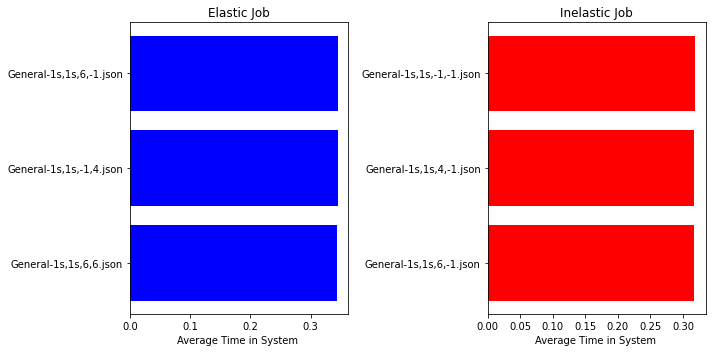

In [38]:
df1,df2 = JobAvgTimeSys(json_data)
p1, p2 = PointEstConfInt(df1,df2)
plotAvgTime(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25015, 95% CI = (0.25015, 0.25015), variance = 0.00000
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25010, 95% CI = (0.25010, 0.25010), variance = 0.00000
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25018, 95% CI = (0.25017, 0.25018), variance = 0.00000
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25013, 95% CI = (0.25013, 0.25014), variance = 0.00000
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25027, 95% CI = (0.25027, 0.25028), variance = 0.00000
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25015, 95% CI = (0.25015, 0.25015), variance = 0.00000
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25021, 95% CI = (0.25021, 0.25021), variance = 0.00000
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:min: point estima

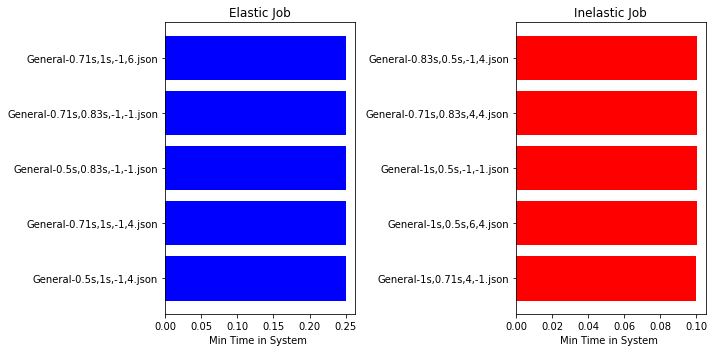

In [39]:
df1,df2 = JobMinTimeSys(json_data)
p1,p2 = PointEstConfInt(df1,df2)
plotMinTime(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 0.81715, 95% CI = (0.81648, 0.81782), variance = 0.00222
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:max: point estimate = 0.82834, 95% CI = (0.82778, 0.82890), variance = 0.00154
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:max: point estimate = 0.81843, 95% CI = (0.81747, 0.81938), variance = 0.00452
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 0.80810, 95% CI = (0.80752, 0.80867), variance = 0.00163
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:max: point estimate = 0.81698, 95% CI = (0.81608, 0.81788), variance = 0.00403
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:max: point estimate = 0.82863, 95% CI = (0.82791, 0.82935), variance = 0.00258
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 0.82687, 95% CI = (0.82618, 0.82755), variance = 0.00232
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:max: point estima

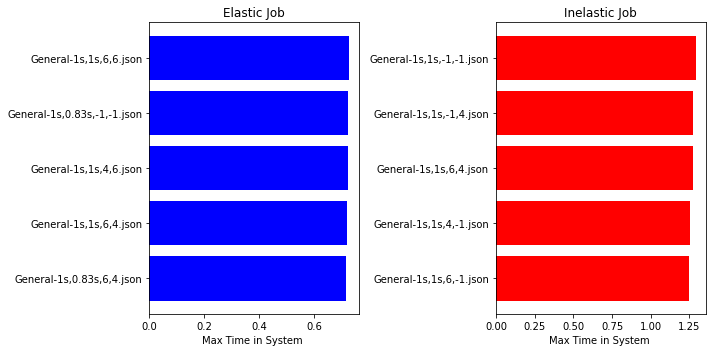

In [40]:
df1,df2 = JobMaxTimeSys(json_data)
p1, p2 = PointEstConfInt(df1,df2)
plotMaxTime(p1,p2)

---------- Dropped jobs in Elastic Queue ---------- 

General-0.5s,0.5s,4,-1.json: point estimate = 1.15000, 95% CI = (1.13258, 1.16742)
General-0.5s,0.5s,4,4.json: point estimate = 0.95000, 95% CI = (0.93508, 0.96492)
General-0.5s,0.5s,4,6.json: point estimate = 0.75000, 95% CI = (0.73883, 0.76117)
General-0.5s,0.71s,4,-1.json: point estimate = 0.60000, 95% CI = (0.58746, 0.61254)
General-0.5s,0.71s,4,4.json: point estimate = 0.70000, 95% CI = (0.68535, 0.71465)
General-0.5s,0.71s,4,6.json: point estimate = 0.55000, 95% CI = (0.54025, 0.55975)
General-0.5s,0.71s,6,4.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
General-0.5s,0.83s,4,-1.json: point estimate = 0.75000, 95% CI = (0.73551, 0.76449)
General-0.5s,0.83s,4,4.json: point estimate = 0.70000, 95% CI = (0.68772, 0.71228)
General-0.5s,0.83s,4,6.json: point estimate = 0.75000, 95% CI = (0.73883, 0.76117)
General-0.5s,1s,4,-1.json: point estimate = 0.40000, 95% CI = (0.38929, 0.41071)
General-0.5s,1s,4,4.json: point est

c:\Users\Giuseppe Caputo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Giuseppe Caputo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


General-0.71s,0.83s,4,4.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
General-0.71s,0.83s,4,6.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
General-0.71s,1s,4,-1.json: point estimate = 0.25000, 95% CI = (0.24093, 0.25907)
General-0.71s,1s,4,4.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
General-0.71s,1s,4,6.json: point estimate = 0.15000, 95% CI = (0.14479, 0.15521)
General-0.83s,0.5s,4,-1.json: point estimate = 0.15000, 95% CI = (0.14305, 0.15695)
General-0.83s,0.71s,4,6.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
General-0.83s,0.83s,4,-1.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
General-0.83s,0.83s,4,4.json: point estimate = 0.15000, 95% CI = (0.14305, 0.15695)
General-0.83s,0.83s,4,6.json: point estimate = 0.10000, 95% CI = (0.09365, 0.10635)
General-0.83s,1s,4,-1.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
General-0.83s,1s,4,4.json: point estimate = 0.05000, 95% CI = (0.04682, 0.05318)
Gene

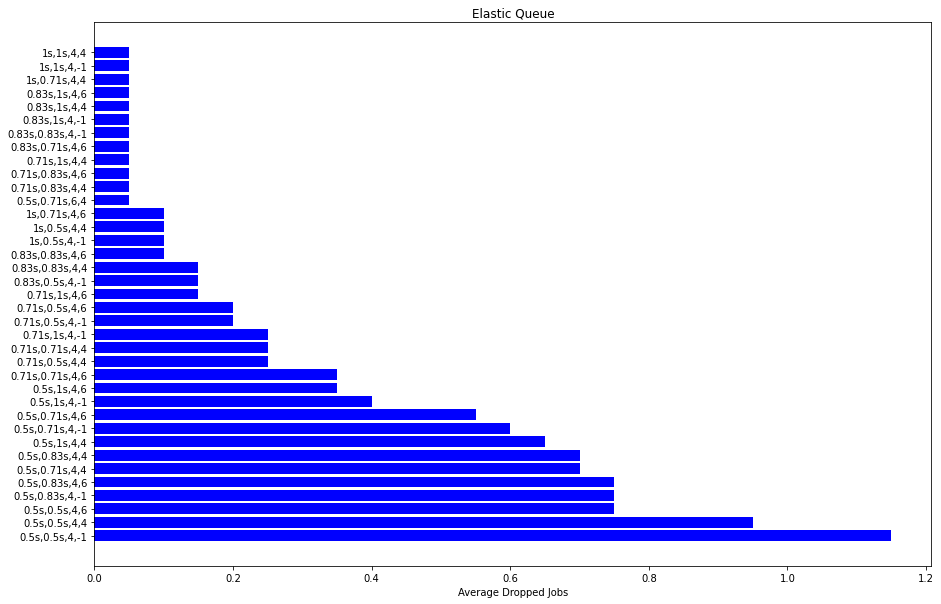

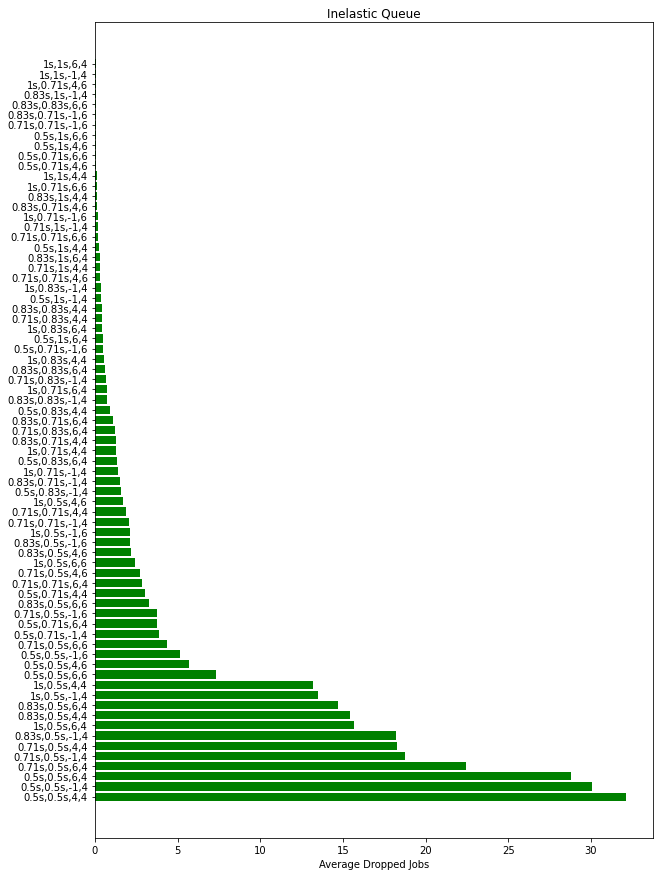

In [41]:
df1,df2 = QueueJobsDropped(json_data)
#p1, p2 = PointEstConfInt(df1,df2)
p1,p2 = AvgDroppedJobs(df1,df2)
plotDropped(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.server|busy:timeavg: point estimate = 0.69851, 95% CI = (0.69838, 0.69865), variance = 0.00009
General-0.5s,0.5s,-1,4.json|Rete.server|busy:timeavg: point estimate = 0.69677, 95% CI = (0.69653, 0.69700), variance = 0.00027
General-0.5s,0.5s,-1,6.json|Rete.server|busy:timeavg: point estimate = 0.69798, 95% CI = (0.69775, 0.69821), variance = 0.00027
General-0.5s,0.5s,4,-1.json|Rete.server|busy:timeavg: point estimate = 0.70235, 95% CI = (0.70219, 0.70251), variance = 0.00013
General-0.5s,0.5s,4,4.json|Rete.server|busy:timeavg: point estimate = 0.69047, 95% CI = (0.69033, 0.69062), variance = 0.00010
General-0.5s,0.5s,4,6.json|Rete.server|busy:timeavg: point estimate = 0.69755, 95% CI = (0.69740, 0.69771), variance = 0.00012
General-0.5s,0.5s,6,-1.json|Rete.server|busy:timeavg: point estimate = 0.70127, 95% CI = (0.70109, 0.70144), variance = 0.00015
General-0.5s,0.5s,6,4.json|Rete.server|busy:timeavg: point estimate = 0.69432, 95% CI = (0.69422, 0.69443

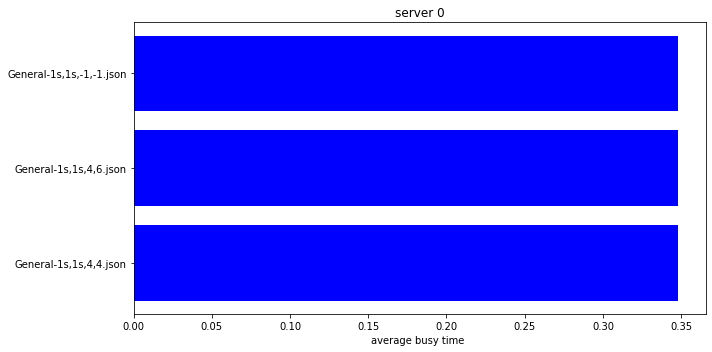

In [64]:
df1 = UseFact(json_data)
p1 = PointEstConfIntUseFact(df1)
plotFactUse(p1)